In [24]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
sns.set()
plt.style.use('seaborn')
pd.options.plotting.backend = "plotly"
plt.rcParams["figure.figsize"] = (16, 8)
sns.set_palette("bright")

In [2]:
df = pd.read_csv('../../corpus/forums/drugsforum/threads/all.csv')
df['title'] = df['title'].str.lower()
df['content'] = df['content'].str.lower()

In [14]:
drug_names=['3mmc']

In [32]:
def get_drug_stats(drug_names):
    drug_df = pd.DataFrame(columns=df.columns)
    # run loop to search for every drug name
    for drug_name in drug_names:
        t_df = df[df['title'].str.contains(drug_name)]
        c_df = df[df['content'].str.contains(drug_name)]
        tc_df = pd.concat([t_df,c_df]).drop_duplicates().reset_index(drop=True)
        drug_df = pd.concat([drug_df, tc_df]).drop_duplicates().reset_index(drop=True)
    
    drug_df['month'] = drug_df['date'].apply(lambda x: int(x.split('-')[1]))
    drug_df['year'] = drug_df['date'].apply(lambda x: int(x.split('-')[0]))
    # print out information
    print('DRUG : ', '/'.join(drug_names))
    print('total occurences : ', drug_df.shape[0])
    print('total views :', drug_df['views'].sum())
    print('total comments :', drug_df['comments'].sum())
    
    
#    drug_df.sort_values(by=['date']).plot(x='date', y='views')
#     sns.lineplot(data=drug_df.sort_values(by=['date']),
#                 x='month',
#                 y='views',
#                 hue='year',
#                 legend='full')
    data=drug_df.sort_values(by=['date'])
    
    sns.lineplot(x=data['month'],
                y=pd.to_numeric(data['views']),
                hue=data['year'],
                legend='full',
                palette = sns.color_palette('rocket', n_colors=len(drug_df['year'].unique())))
    
    plt.title('views of posts related to ' + '/'.join(drug_names))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2);
    

DRUG :  cocaine
total occurences :  24
total views : 85359
total comments : 447


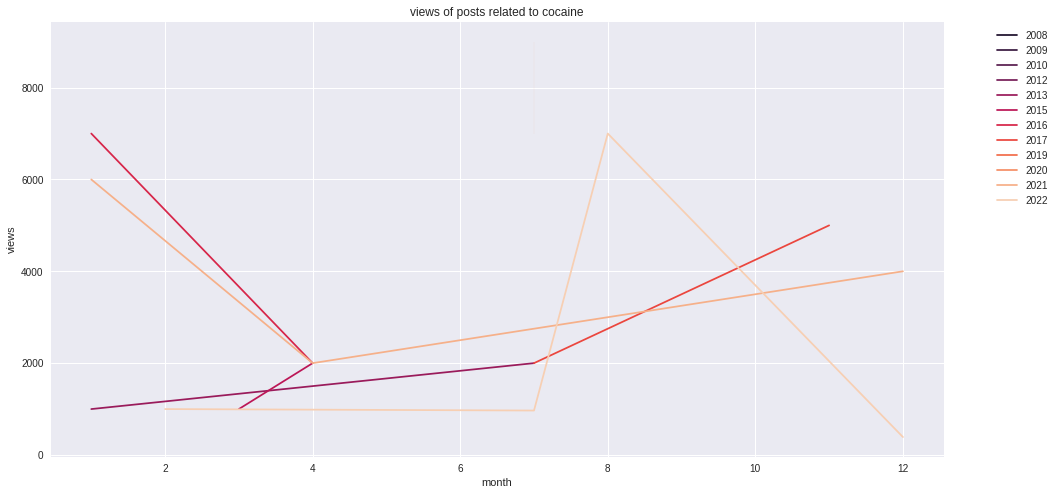

In [34]:
drug_names = ['cocaine']
get_drug_stats(drug_names)

In [109]:
drug_df

,thread_id,forum,title,content,views,comments,url,username,user_id,user_url,date
0,73438,drugsforum,"3mmc 1 gram eerste keer, volgende dag school.",ik wil volgende week zondag voor het eerst 3m...,295,12,https://drugsforum.nl/threads/3mmc-1-gram-eers...,sayoefie,156068,https://drugsforum.nl/members/sayoefie.156068/,2022-12-10
1,73381,drugsforum,3mmc magnetron,"hoi hoi, lang niets gepost. 3mmc is heel pla...",567,9,https://drugsforum.nl/threads/3mmc-magnetron.7...,Krullen,128087,https://drugsforum.nl/members/krullen.128087/,2022-11-30
2,73309,drugsforum,3mmc oraal doseren,"hallo allemaal, morgen staat er een hardstyl...",684,15,https://drugsforum.nl/threads/3mmc-oraal-doser...,2C-Baasje,154352,https://drugsforum.nl/members/2c-baasje.154352/,2022-11-18
3,73261,drugsforum,3mmc dosering,goedemorgen! ik wil binnenkort 3mmc gaan sli...,764,5,https://drugsforum.nl/threads/3mmc-dosering.73...,qwertysafgo,155065,https://drugsforum.nl/members/qwertysafgo.155065/,2022-11-10
4,73248,drugsforum,hees/zwaardere stem na 3mmc slikken?,"hallo allemaal, eerste post hier dus vergeef ...",1000,21,https://drugsforum.nl/threads/hees-zwaardere-s...,Nassauwe,156994,https://drugsforum.nl/members/nassauwe.156994/,2022-11-07
...,...,...,...,...,...,...,...,...,...,...,...
221,62792,drugsforum,eerste keer hardrugs proberen,hallo ik heb net mijn account aangemaakt na...,3000,12,https://drugsforum.nl/threads/eerste-keer-hard...,Davy,142618,https://drugsforum.nl/members/davy.142618/,2018-03-26
222,61681,drugsforum,mxp (methoxphenidine) ervaring,"hallo allemaal, ben nieuw op dit forum, zoek ...",2000,1,https://drugsforum.nl/threads/mxp-methoxphenid...,Bokter,141409,https://drugsforum.nl/members/bokter.141409/,2017-09-08
223,59325,drugsforum,3-mmc versneden met heroine of valspositief?,"beste, ik had via een bekende (en ik denk al...",1000,1,https://drugsforum.nl/threads/3-mmc-versneden-...,honolulu4,132755,https://drugsforum.nl/members/honolulu4.132755/,2016-06-04
224,54671,drugsforum,research chemicals,hallo iemand ervaring heeft met 3mmc en ander...,1000,1,https://drugsforum.nl/threads/research-chemica...,gerardo,118479,https://drugsforum.nl/members/gerardo.118479/,2015-01-29
